## Analysis of Travel Insurance Data

### Business Problem
***
SafeTravel Inc. is one of the world's largest insurance companies specializing in travel insurance. During travel, there are a lot of risk factors - loss of baggage, airline cancellations, health issues, etc. 

For an insurance company, the forecasting of claims is central to a successful operation. If the claims can be forecasted accurately, premiums can be adjusted accordingly, creating the opportunity to be one step ahead of the competitors. Charging a lower premium than the competitors, while maintaining a sufficient buffer to make profit to stay in business, will lead to more customers, which will in turn lead to more profit.

Our objective is to help the underwriting team in Safe Travel, Inc. to predict whether a new buyer will make the claim or not:
- This will eventually help the underwriter determine the premium for the buyer and the extent of coverage for the buyer
- It will also help the underwriter devise new travel insurance products that would help get more customers on board

<b> What is Travel Insurance and how does it work? </b>

- The main categories of travel insurance include 
    - Trip cancellation or interruption coverage 
    - Baggage and personal effects coverage 
    - Medical coverage 
    - Accidental death or flight accident coverage

### Who are the Stakeholders? Who will benefit from the findings?
***
- <b> Insurance Underwriter - Chosen this to be our Stakeholder </b>
- Head of Claims Department
- Head of Finance Department
- Head of Marketing Department

<b> What does an Insurance Underwriter do? </b>
- An insurance underwriter reviews and evaluates:
    - The level of risk you pose
    - Your premiums
    - The extent of coverage for which you are eligible
    
- With the help of computer programs, underwriters determine the risk involved in insuring a particular person or company and calculate the appropriate premiums for the amount of coverage requested
- The underwriters job is to on-board more customers with low risk profile so that they can increase the revenue for the organization
- If an underwriter is too conservative, an insurance company may lose business. If they are too generous, the company may need to pay excessive claims

<b> What does the Claims Department do? </b>
- They study the claim and decide whether to accept or reject the claim
- They decide the claim amount on case-to-case basis (also depends on the policy opted for by the insured)
- They are in charge of Claims Reserve (indirectly they are responsible for company's profits)

### Data Science Problem
***
- To predict if a new buyer will make the claim or not basis the given data

### Business Metric
*** 
- To correctly identify high and low risk customers by looking at the claim pattern, such that we increase the customer onboarding rate by 25%
- This will eventually help to increase the top line figures (revenue)

Reasoning:
- Accurately forecasting insurance claims helps insurance companies to improve their pricing model. Applying the correct methods can help insurance companies to be one step ahead of their competitors, which can result in more clients which in turn can lead to more profit.


Reference: 
- https://thesis.eur.nl/pub/39731/Pijl.pdf
- https://blog.travelinsure.com/2018/03/increasing-your-revenue-through-travel-insurance-sales.html
- https://www.travelinsurance.com/faqs/

### Data Science Metric
***
- Precision - We are trying to reduce the number of instances where we have predicted that a person will claim but he has not claimed
- This is because:
    - We will charge a high premium to such False Positive cases, which in turn means risk of losing prospective customers or less repeat business
    - It will make our product less competitive over the competitor products
    
Assumption
- We are assuming our model to be an intermediary model over which we can build a model for the underwriting team that can predict whether to sanction insurance or not as well as the premium that should be charged

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load Datasets
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [6]:
# Importing Plotly Library and necessary Packages
import plotly as py
from plotly.offline import iplot, init_notebook_mode
import plotly.tools as tls

# Import cufflinks
import cufflinks as cf

# Work on the graphs offline
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

## Data Exploration

In [7]:
# Display random 5 rows
train.sample(n=5)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
24333,9258,EPX,Travel Agency,Online,2 way Comprehensive Plan,65,PHILIPPINES,51.000000,0.000000,30,1
15073,5935,C2B,Airlines,Online,Silver Plan,38,SINGAPORE,107.075854,26.773964,54,1
50500,4464,EPX,Travel Agency,Online,1 way Comprehensive Plan,1,SINGAPORE,20.000000,0.000000,40,0
14095,3517,EPX,Travel Agency,Online,Cancellation Plan,29,SRI LANKA,25.000000,0.000000,36,0
33600,9013,JWT,Airlines,Online,Value Plan,24,INDIA,31.000000,12.400000,118,0


In [8]:
# Shape
train.shape

(52310, 11)

In [9]:
# Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [10]:
# Describe
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


### Observations from Initial Data Exploration
- There are **no NULL values** in the dataset
- Duration, Net Sales and Commission are **Right Skewed**
- There are 5 numerical columns and 5 categorical columns

###  Initial Assumptions 
-  1: Claimed, 0: Not Claimed 
-  Unit of Duration: Days 
-  Unit of Net Sales and Commission is USD 
-  Value of 0 in Commission: No commission was charged 
-  Total Premium Charged = Net Sales + Commission Charged, as commission is exclusive of the product premium 
-  We are assuming a 'No Covid' situation when analyzing the data 

## Data Analysis

### Univariate Analysis

#### How many claims were made?

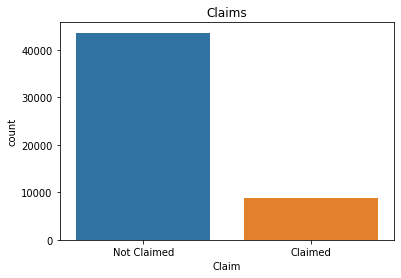

In [11]:
sns.countplot(train['Claim'])
plt.xticks((0, 1), ('Not Claimed', 'Claimed'), rotation='horizontal')
plt.title('Claims')
plt.show()

In [12]:
train['Claim'].value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

<b> Insight </b>
- The number of customers who have not made any claim is almost 4 times the number of customers who have made the claim

<b> Assumption </b>
- We are assuming Claimed as High Risk Profile and Not Claimed as Low Risk Profile for the purpose of our analysis
- We will deep dive into the behaviour of these two profiles as that will help the underwriting team to build policies to onboard more customers

####  Age distribution of SafeTravel, Inc. customers

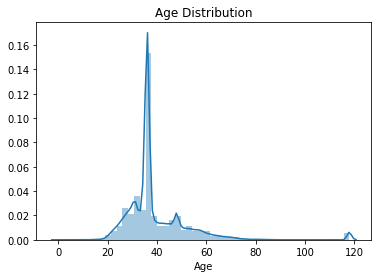

In [13]:
sns.distplot(train['Age'])
plt.title('Age Distribution')
plt.show()

In [14]:
# Measuring skewness of Age data
train['Age'].skew()

2.9478911827909426

In [15]:
train[train['Age']>70]['Claim'].value_counts(normalize=True)

0    0.888277
1    0.111723
Name: Claim, dtype: float64

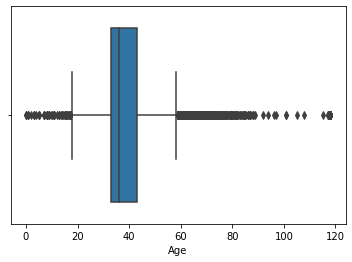

In [16]:
# Checking the shape and variability of Age data
sns.boxplot(train['Age'])

In [17]:
train[train['Claim']==1]['Age'].quantile([0.025, 0.25, 0.5, 0.75, 0.975])

0.025    23.0
0.250    30.0
0.500    36.0
0.750    42.0
0.975    67.0
Name: Age, dtype: float64

<b> Insight </b>
- The age distribution is right skewed with a value of 2.95
- We see maximum purchase of travel insurance in the age group of 33-43 years

#### *Net Sales* distribution of SafeTravel, Inc. customers

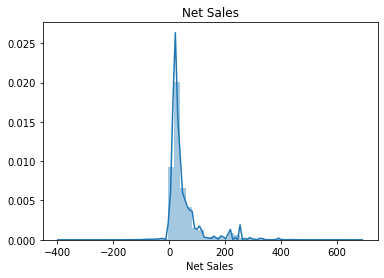

In [18]:
sns.distplot(train['Net Sales'])
plt.title('Net Sales')
plt.show()

In [19]:
# Measuring skewness of Net Sales data
train['Net Sales'].skew()

2.811837338046441

##### How many instances do we have with net sales <0?

In [21]:
train[train['Net Sales'] < 0].shape[0]

503

<b> Insight </b>
- Instances with negative values of Net Sales is ~1% of the entire data

<b> Assumption </b>
- We are making an assumption that instances where Net Sales <0 is premium adjusted against discount vouchers/ promotional offers/ group discounts and can be negative

#### Distribution of Commission charged by the Agencies

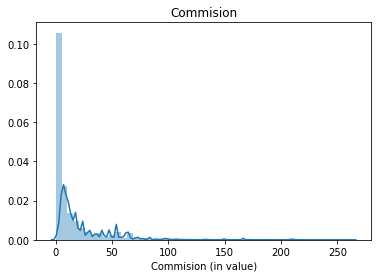

In [20]:
sns.distplot(train['Commision (in value)'])
plt.title('Commision')
plt.show()

In [22]:
# Measuring skewness of Commission data
train['Commision (in value)'].skew()

3.5356943446774736

<b> Insight </b>
- Commission is right skewed with all positive values. There could be cases where commission > net sales
- We will analyze the relationship between Net Sales & Commission in the next section

#### Distribution of Duration of Stay

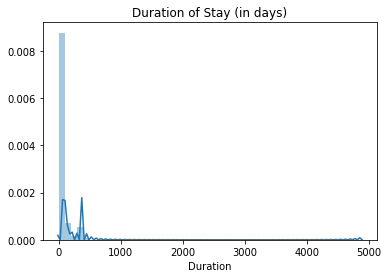

In [23]:
sns.distplot(train['Duration'])
plt.title('Duration of Stay (in days)')
plt.show()

In [24]:
# Measuring skewness of Duration data
train['Duration'].skew()

15.3525235978114

##### How many instances do we have whose duration of stay is more than 550 days (1.5 years)?

In [25]:
train[train['Duration'] > 550].shape[0]

10

##### How many instances have negative values for duration?

In [26]:
train[train['Duration'] < 0].shape[0]

4

<b> Insight </b>
- Distribution of Duration data is right skewed. We can apply feature transformation on the data to make it normal
- It has few negative values that we can impute with 0

#### Which are the top 10 products of Safe Travel, Inc bought by the customer?

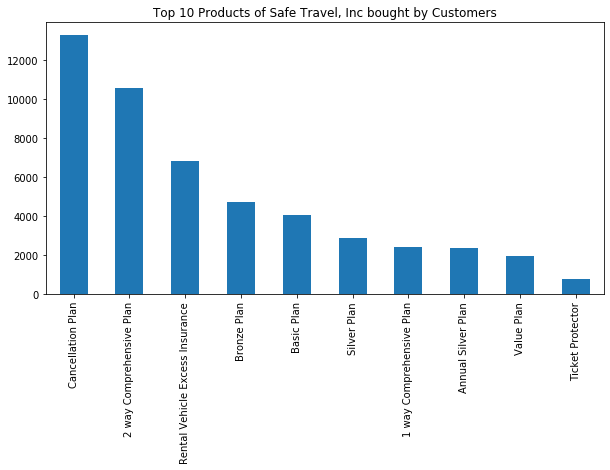

<Figure size 432x288 with 0 Axes>

In [27]:
train['Product Name'].value_counts().head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Products of Safe Travel, Inc bought by Customers')
plt.show()
plt.savefig('fig1.png')

<b> Insight </b>
- Cancellation plan is the most preferred product amongst customers; This plan is the most preferred plan because it reimburses for pre-paid non refundable trip costs

##### Which are the top 10 agencies preferred by the customers of Safe Travel, Inc?

In [28]:
train['Agency'].value_counts().head(10).iplot(kind='bar', xTitle = 'Agency', yTitle = "# of Safe Travel, Inc policies bought through them", title="Top 10 Agencies that have the Highest Claim Rate")

<b> Insight </b>
- EPX is the most preferred agency followed by C2B, CWT and JZI 

In [29]:
xtab = pd.DataFrame(train[train['Agency']=='EPX']['Product Name'].value_counts(normalize=True)*100)
xtab1 = pd.DataFrame(train[train['Agency']=='EPX']['Product Name'].value_counts())

In [36]:
ytab = pd.DataFrame(train[(train['Agency']=='EPX') & (train['Claim']==1)]['Product Name'].value_counts()).index

In [37]:
xtab

,Product Name
Cancellation Plan,50.553055
2 way Comprehensive Plan,40.258601
1 way Comprehensive Plan,9.188344


In [38]:
ytab

Index(['2 way Comprehensive Plan', 'Cancellation Plan',
       '1 way Comprehensive Plan'],
      dtype='object')

In [39]:
xtab1

,Product Name
Cancellation Plan,13254
2 way Comprehensive Plan,10555
1 way Comprehensive Plan,2409


In [43]:
ytab['Product Name']=(ytab['Product Name']/xtab1['Product Name'])*100

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
ytab

Index(['2 way Comprehensive Plan', 'Cancellation Plan',
       '1 way Comprehensive Plan'],
      dtype='object')

In [46]:
z = pd.merge(xtab, ytab, left_index=True, right_index=True)
z

TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.indexes.base.Index'> was passed

In [45]:
z.rename(columns={'Product Name_x':'% Sold', 'Product Name_y':'% Claimed'}, inplace=True)

NameError: name 'z' is not defined

In [44]:
z.sort_values(by='% Sold', ascending=False).plot(kind='bar', stacked=False, figsize=(5,2))
plt.xticks(rotation='horizontal', fontsize=6)
plt.legend(fontsize=6)
plt.yticks(fontsize=6)

NameError: name 'z' is not defined

In [205]:
train[(train['Agency']=='EPX') & (train['Claim']==1) & (train['Product Name']=='Cancellation Plan')]['Age'].mean()

34.349295774647885

In [206]:
train[(train['Agency']=='EPX') & (train['Claim']==1) & (train['Product Name']=='2 way Comprehensive Plan')]['Age'].mean()

37.5662319835278

In [207]:
train[(train['Agency']=='EPX') & (train['Claim']==1) & (train['Product Name']=='1 way Comprehensive Plan')]['Age'].mean()

62.36764705882353

In [194]:
train.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

#### Which are the top 10 destinations for which travelers prefer to buy an insurance before traveling?

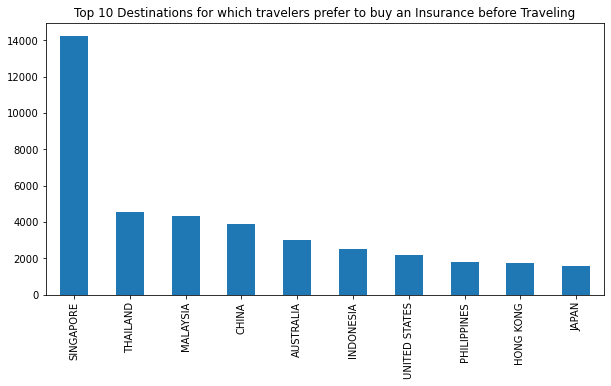

In [27]:
train['Destination'].value_counts().head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Destinations for which travelers prefer to buy an Insurance before Traveling')
plt.show()

<b> Insight </b>
- Safe Travel, Inc have most customers buying insurance for their travel to Singapore followed by Thailand, Malaysia and China

### Bivariate Analysis

In [28]:
train_copy = train.copy()

In [29]:
train_copy['Claim'].replace({0:'Not Claimed', 1:'Claimed'}, inplace=True)
train_copy['Claim'].values

array(['Not Claimed', 'Not Claimed', 'Not Claimed', ..., 'Not Claimed',
       'Not Claimed', 'Not Claimed'], dtype=object)

#### Agency Type vs Claim

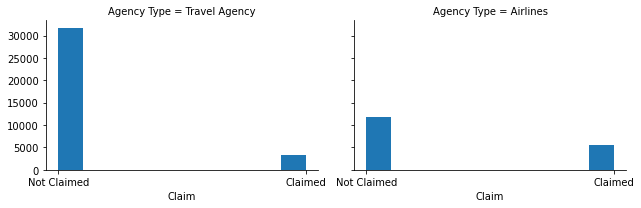

In [30]:
fg =sns.FacetGrid(train_copy,col="Agency Type",height=3,aspect=1.5)
fg = fg.map(plt.hist,"Claim")

<b> Insight </b>
- The number of travelers who have bought insurance through airlines claim more as compared to travelers who have bought insurance through travel agency

<b> Recommendation </b>
- Since we have low risk profiles buying insurance from travel agencies, we should incentivize them with discount vouchers and other promotional offers so that they can attract more customers

#### Does age affect the claim?

In [31]:
age_claim_table = train.groupby(['Age', 'Claim'])['Claim'].count().unstack()
train_filtered = train[(train['Age'] >=20) & (train['Age'] <=60)]
age_claim_table2=train_filtered.groupby(['Age', 'Claim'])['Claim'].count().unstack()

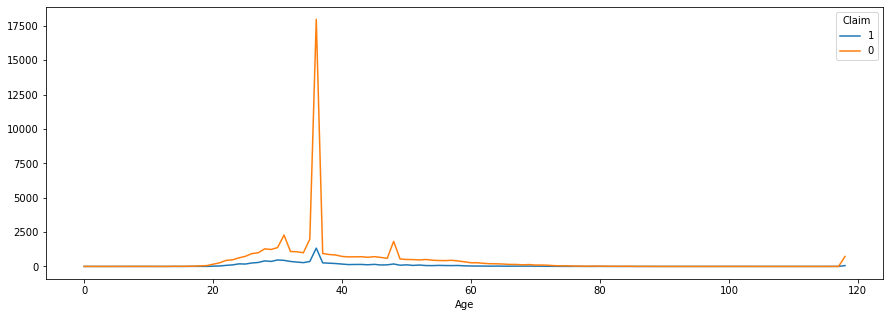

In [32]:
age_claim_table[[1,0]].plot(kind='line',stacked=True, figsize=(15, 5))
plt.show()

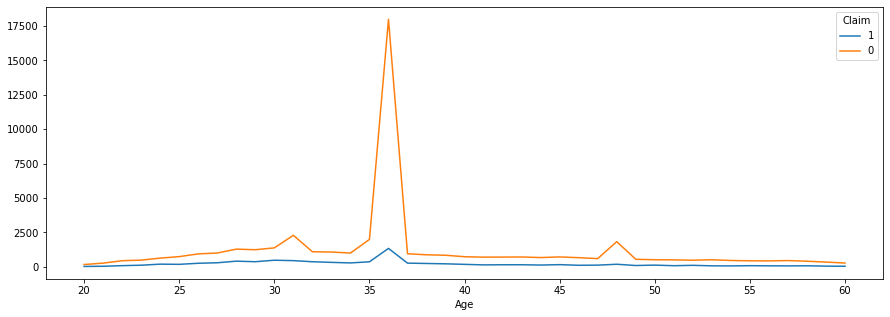

In [33]:
age_claim_table2[[1,0]].plot(kind='line', stacked=True, figsize=(15, 5))
plt.show()

<b> Insight </b>
- Age group of 30-40 years tends to claim more

#### Which Destination has a High Claim Rate?

In [34]:
train.groupby('Destination').Claim.value_counts(normalize = True).unstack()[1].sort_values(ascending = False)[:5]*100

Destination
SINGAPORE        37.256003
SOUTH AFRICA     33.333333
NEPAL            32.031250
COSTA RICA       25.000000
UNITED STATES    20.218579
Name: 1, dtype: float64

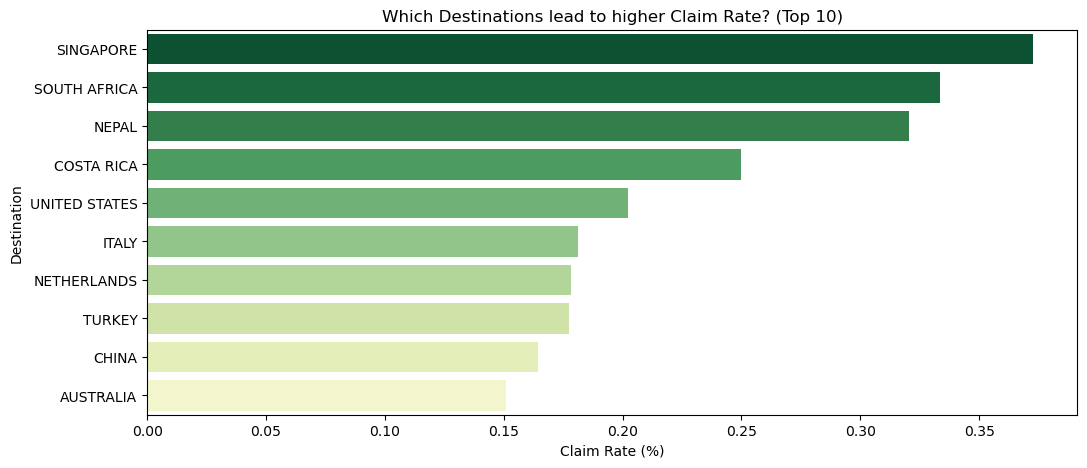

In [35]:
plt.rcdefaults()
plt.figure(figsize = (12,5))
sns.barplot(x = train.groupby('Destination').Claim.value_counts(normalize = True).unstack()[1].sort_values(ascending = False)[:10].values,
           y = train.groupby('Destination').Claim.value_counts(normalize = True).unstack()[1].sort_values(ascending = False)[:10].index,
           palette = 'YlGn_r')
plt.xlabel('Claim Rate (%)')
plt.title('Which Destinations lead to higher Claim Rate? (Top 10)');

<b> Insight </b>
- Travelers to Singapore, South Africa and Nepal have a high claim rate in the tune of 25-35%

#### Products vs Claim

In [36]:
product_claim_table = train.groupby(['Product Name', 'Claim'])['Claim'].count().unstack()

In [37]:
product_claim_table['Total'] = product_claim_table[0]+product_claim_table[1]
product_claim_table[0] = round(
    (product_claim_table[0]/product_claim_table['Total'])*100, 2)
product_claim_table[1] = round(
    (product_claim_table[1]/product_claim_table['Total'])*100, 2)
product_claim_table.sort_values([1, 0], ascending=True, inplace=True)

In [38]:
product_claim_table = product_claim_table.iloc[:23]
product_claim_table

Claim,0,1,Total
Product Name,,,
Premier Plan,98.58,1.42,141.0
Cancellation Plan,97.32,2.68,13254.0
1 way Comprehensive Plan,97.18,2.82,2409.0
Comprehensive Plan,95.68,4.32,278.0
Value Plan,95.21,4.79,1961.0
Travel Cruise Protect,94.67,5.33,394.0
Basic Plan,93.91,6.09,4042.0
Ticket Protector,92.69,7.31,780.0
Spouse or Parents Comprehensive Plan,91.67,8.33,12.0


In [69]:
least = product_claim_table[[1, 0]].head().index
least

Index(['Premier Plan', 'Cancellation Plan', '1 way Comprehensive Plan',
       'Comprehensive Plan', 'Value Plan'],
      dtype='object', name='Product Name')

In [70]:
top = product_claim_table[[1, 0]].tail().index
top

Index(['Silver Plan', 'Single Trip Travel Protect Platinum',
       'Annual Gold Plan', 'Annual Silver Plan', 'Annual Travel Protect Gold'],
      dtype='object', name='Product Name')

In [73]:
print(train[(train['Product Name'].isin(top)) & (train['Claim']==1)]['Age'].mean())
print(train[(train['Product Name'].isin(top)) & (train['Claim']==1)]['Age'].median())

37.31129996852376
34.0


In [74]:
print(train[(train['Product Name'].isin(least)) & (train['Claim']==1)]['Age'].mean())
print(train[(train['Product Name'].isin(least)) & (train['Claim']==1)]['Age'].median())

44.96045197740113
36.0


In [75]:
train.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

In [78]:
train[(train['Product Name'].isin(top)) & (train['Claim']==1)]['Destination'].value_counts(normalize=True).sort_values(ascending=False)

SINGAPORE                    0.946490
UNITED STATES                0.036512
HONG KONG                    0.007240
UNITED KINGDOM               0.004721
TAIWAN, PROVINCE OF CHINA    0.003148
CHINA                        0.001574
MALAYSIA                     0.000315
Name: Destination, dtype: float64

In [79]:
train[(train['Product Name'].isin(least)) & (train['Claim']==1)]['Destination'].value_counts(normalize=True).sort_values(ascending=False)

THAILAND                0.256121
UNITED STATES           0.107345
CHINA                   0.105461
INDONESIA               0.090395
SINGAPORE               0.077213
SPAIN                   0.064030
JAPAN                   0.062147
INDIA                   0.060264
VIET NAM                0.060264
MALAYSIA                0.050847
PHILIPPINES             0.018832
KOREA, REPUBLIC OF      0.015066
CANADA                  0.011299
NETHERLANDS             0.003766
BRUNEI DARUSSALAM       0.003766
FRANCE                  0.001883
UNITED ARAB EMIRATES    0.001883
HONG KONG               0.001883
ISRAEL                  0.001883
UNITED KINGDOM          0.001883
SWITZERLAND             0.001883
AUSTRALIA               0.001883
Name: Destination, dtype: float64

In [81]:
train[(train['Product Name'].isin(top)) & (train['Claim']==1)]['Agency Type'].value_counts(normalize=True)

Airlines         0.94649
Travel Agency    0.05351
Name: Agency Type, dtype: float64

In [82]:
train[(train['Product Name'].isin(top)) & (train['Claim']==1)]['Distribution Channel'].value_counts(normalize=True)

Online    1.0
Name: Distribution Channel, dtype: float64

In [83]:
train[(train['Product Name'].isin(least)) & (train['Claim']==1)]['Agency Type'].value_counts(normalize=True)

Travel Agency    0.907721
Airlines         0.092279
Name: Agency Type, dtype: float64

In [84]:
train[(train['Product Name'].isin(least)) & (train['Claim']==1)]['Distribution Channel'].value_counts(normalize=True)

Online     0.932203
Offline    0.067797
Name: Distribution Channel, dtype: float64

In [85]:
print(train[(train['Product Name'].isin(top)) & (train['Claim']==1)]['Net Sales'].mean())
print(train[(train['Product Name'].isin(top)) & (train['Claim']==1)]['Commision (in value)'].mean())

167.53293747732633
46.23609253674626


In [86]:
print(train[(train['Product Name'].isin(least)) & (train['Claim']==1)]['Net Sales'].mean())
print(train[(train['Product Name'].isin(least)) & (train['Claim']==1)]['Commision (in value)'].mean())

33.08431402928502
3.7963203237033816


In [89]:
print(train[(train['Product Name'].isin(top)) & (train['Claim']==1)]['Duration'].median())
print(train[(train['Product Name'].isin(least)) & (train['Claim']==1)]['Duration'].median())

364.0
28.0


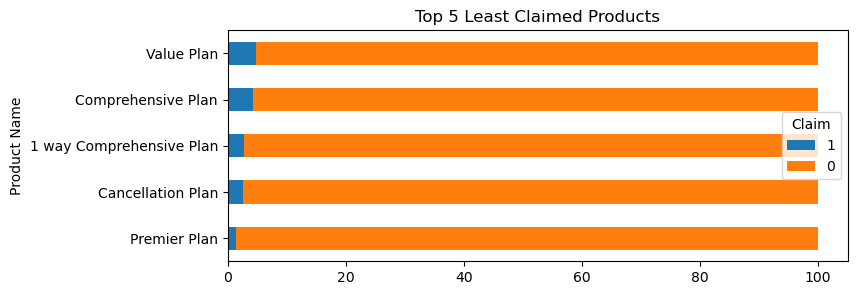

In [39]:
# Least Claimed
product_claim_table[[1, 0]].head().plot(
    kind='barh', stacked=True, figsize=(8, 3))
plt.title('Top 5 Least Claimed Products')
plt.show()

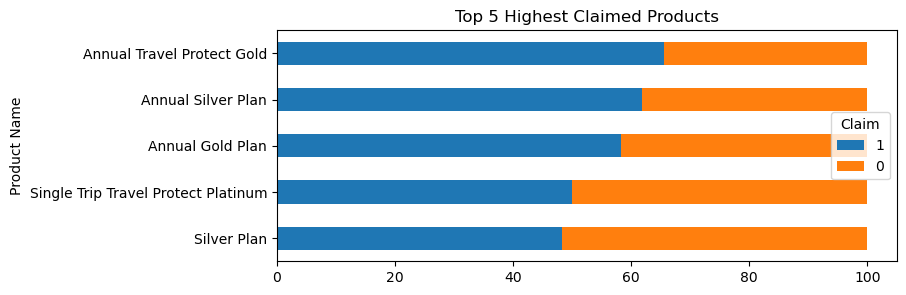

In [40]:
# Highest Claimed
product_claim_table[[1, 0]].tail().plot(
    kind='barh', stacked=True, figsize=(8, 3))
plt.title('Top 5 Highest Claimed Products')
plt.show()

<b>Insight </b>
- The top 3 most bought plans are - Cancellation Plan, 2 Way Comprehensive Plan, Rental Vehicle Excess Insurance
    - The above plans have claims in the range of 3-14%
- Annual Travel Protect Gold, Annual Silver Plan and Annual Gold Plan have less buyers and highest claims
    - The above plans have claims in the range of 58-66%

### Multivariate Analysis

#### How Net Sales and Duration collectively affect Claim?

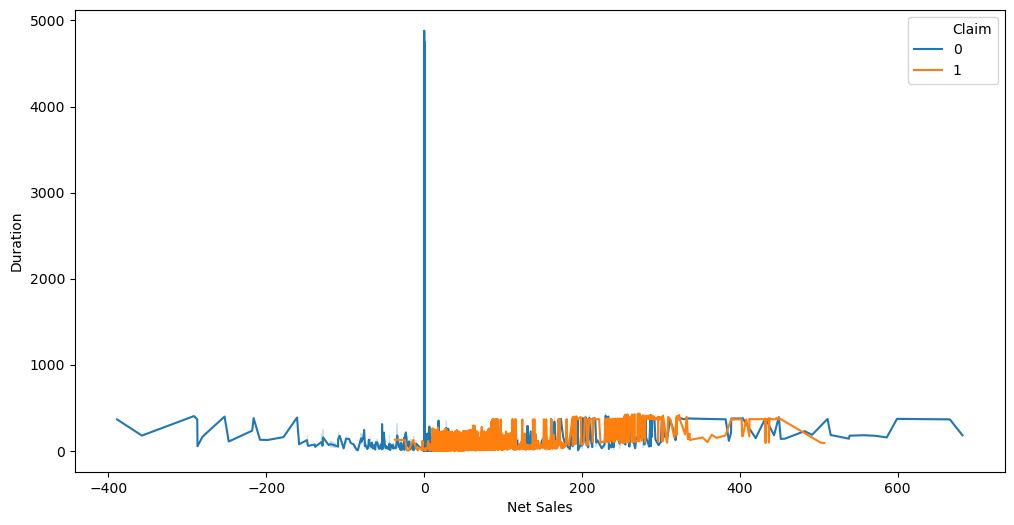

In [41]:
plt.figure(figsize=(12,6))
sns.lineplot(data = train, y= 'Duration',x = 'Net Sales', hue = 'Claim')

In [42]:
netsale_duration_train=train[(train['Net Sales'] < 0) & (train['Claim'] ==1)]

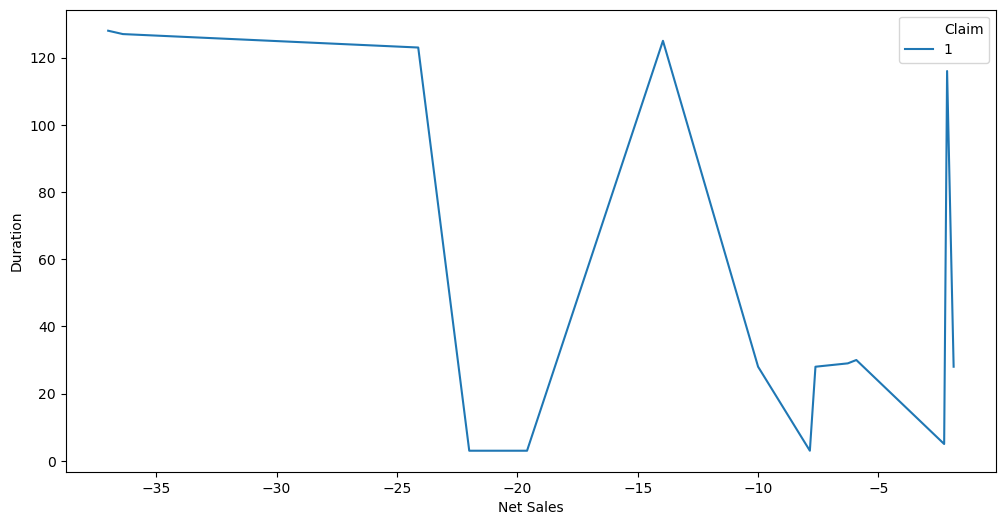

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(data = netsale_duration_train, y= 'Duration',x = 'Net Sales', hue = 'Claim')

In [44]:
netsale_duration_train4 = train[(train['Net Sales'] < 550) & (train['Net Sales'] >=-100) & (train['Duration'] >=0) & (train['Duration'] <=1000)]

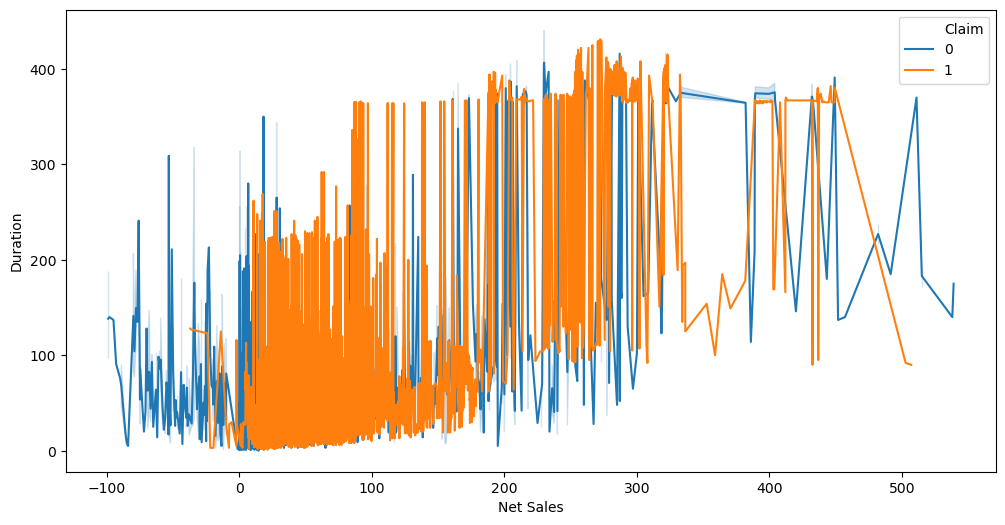

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(data = netsale_duration_train4, y= 'Duration',x = 'Net Sales', hue = 'Claim')

<b> Insight </b>
- Net sales range is -400 to +600
- For -ve net sales -35 to 0 is claim range

#### Are certain products more likely to be used by people traveling to certain countries?

In [46]:
product_destination_table = train.groupby(['Product Name','Destination','Claim'])['Destination'].count().sort_values(ascending=False)

In [47]:
product_destination_table.head(10)

Product Name                     Destination  Claim
Bronze Plan                      SINGAPORE    0        2703
                                              1        2020
Rental Vehicle Excess Insurance  AUSTRALIA    0        1709
Cancellation Plan                SINGAPORE    0        1628
Silver Plan                      SINGAPORE    0        1478
Annual Silver Plan               SINGAPORE    1        1451
Silver Plan                      SINGAPORE    1        1384
Cancellation Plan                MALAYSIA     0        1241
                                 THAILAND     0        1192
2 way Comprehensive Plan         THAILAND     0        1168
Name: Destination, dtype: int64

<b> Insight </b>
- Destination SINGAPORE has claims with Bronze Plan 2020  and not claimed 2703
- Destination SINGAPORE has claims with Annual Silver Plan 1451 with 0 no claims
- Destination SINGAPORE has claims with Silver Plan 1384 with zero no claims.
- Destination SINGAPORE has more claims

#### What is the *Average Net Sales* received for each product?

In [48]:
product_sales_table = train.groupby(['Product Name'])[
    'Net Sales'].mean().sort_values(ascending=False)
product_sales_table

Product Name
Annual Gold Plan                        356.650083
Annual Travel Protect Platinum          330.869159
Annual Travel Protect Gold              258.711839
Annual Silver Plan                      225.598643
Annual Travel Protect Silver            197.343618
Individual Comprehensive Plan            98.819497
Spouse or Parents Comprehensive Plan     86.000000
Gold Plan                                75.505900
Child Comprehensive Plan                 74.000000
Premier Plan                             63.340426
Silver Plan                              59.400097
Value Plan                               47.526106
Single Trip Travel Protect Platinum      46.591398
Rental Vehicle Excess Insurance          46.103047
2 way Comprehensive Plan                 43.871924
Single Trip Travel Protect Gold          37.944770
Bronze Plan                              35.181802
Single Trip Travel Protect Silver        34.368907
Travel Cruise Protect                    29.270888
Comprehensive Plan

In [49]:
product_sales_table.loc[['Annual Gold Plan', 'Annual Travel Protect Gold', 'Annual Silver Plan',
                         'Cancellation Plan', '2 way Comprehensive Plan', 'Rental Vehicle Excess Insurance']].sort_values(ascending=False)

Product Name
Annual Gold Plan                   356.650083
Annual Travel Protect Gold         258.711839
Annual Silver Plan                 225.598643
Rental Vehicle Excess Insurance     46.103047
2 way Comprehensive Plan            43.871924
Cancellation Plan                   26.303287
Name: Net Sales, dtype: float64

<b> Observation </b>
- We see that the premium for "less bought, high claimed" products is higher compared to "most bought, less claimed" products

#### Net Sales vs Commission

<b>How many instances do we have where Net Sales value is less than Commission?</b>

In [50]:
train[train['Net Sales'] < train['Commision (in value)']].shape[0]

1454

<b> Insight </b>
- Commission is a percentage of Net Sales value. Hence, it is not possible to have commission greater than Net Sales
- It would be interesting to find the relationship between 'Net Sales' and 'Commission' for different products and different agencies

<b> Is there a relation between Net Sales and Commission? </b>

In [51]:
top10_products = train[train['Claim']==1]['Product Name'].value_counts().head(10).index
bottom10_products = train[train['Claim']==1]['Product Name'].value_counts().tail(10).index

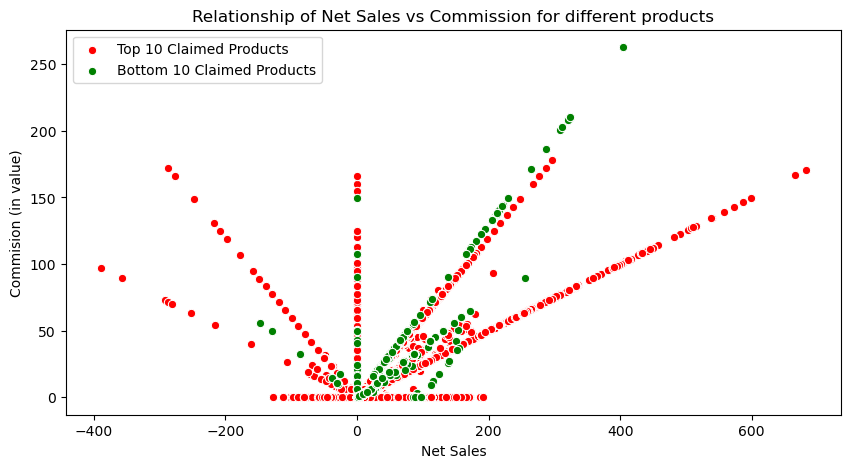

In [52]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train[train["Product Name"].isin(top10_products)], x='Net Sales',
                y='Commision (in value)', color='red')
sns.scatterplot(data=train[train["Product Name"].isin(bottom10_products)], x='Net Sales',
                y='Commision (in value)', color='green')
plt.title('Relationship of Net Sales vs Commission for different products')
plt.legend(['Top 10 Claimed Products', 'Bottom 10 Claimed Products'])
plt.show()

In [53]:
# Average & Median Commission of Top 10 Claimed Products
print(train[train["Product Name"].isin(top10_products)]['Commision (in value)'].mean())
print(train[train["Product Name"].isin(top10_products)]['Commision (in value)'].median())

11.615338942460149
0.0


In [54]:
# Average & Median Commission of Bottom 10 Claimed Products
print(train[train["Product Name"].isin(bottom10_products)]['Commision (in value)'].mean())
print(train[train["Product Name"].isin(bottom10_products)]['Commision (in value)'].median())

20.29757697695259
9.57


<b> Insight </b>
- High claimed products have high commission for high Net Sales and for products that were sold at a high negative sales
- However, it has low commission for products that were sold at a low negative sales with majority of the policies being sold at 0 commission
- For products that have low claim rate, the net sales is in the range of -200 to 400 with an average commission lying in the range of 0-50

<b> Recommendation </b>
- Low risk profile customers should be charged a low commission to ensure that we have more people buying our products

<b> Hypothesis </b>
- Null Hypothesis: There is no difference in the average commission charged at Net Sales>0 and Net Sales<0
- Alternate Hypothesis: There is a difference in the average commission charged at Net Sales>0 and Net Sales<0

In [55]:
# Testing the hypothesis through 2-tailed z-test

# Import Package
from statsmodels.stats.weightstats import ztest

x1 = train[(train['Net Sales']>0) & (train['Net Sales']<=400) & (train["Product Name"].isin(top10_products))]['Commision (in value)']
x2= train[(train['Net Sales']<0) & (train['Net Sales']>=-400) & (train["Product Name"].isin(top10_products))]['Commision (in value)']
          
# Apply ztest 
z_statistic, p_value = ztest(x1=x1, x2=x2, alternative='two-sided')

# print z statistic and p value
print("Z-statistics = ",z_statistic)
print("p-value = ",p_value)
      
# check the p-value
if p_value<0.05:
    inference='Reject Null Hypothesis: There is a difference in the average commission charged at Net Sales>0 and Net Sales<0'
else:
    inference='Failed to Reject Null Hypothesis: There is no difference in the average commission charged at Net Sales>0 and Net Sales<0'
    
print("Inference:", inference)

Z-statistics =  -14.123573783484744
p-value =  2.7184789110718654e-45
Inference: Reject Null Hypothesis: There is a difference in the average commission charged at Net Sales>0 and Net Sales<0


In [56]:
x1.mean()

11.101160750597652

In [57]:
x2.mean()

23.983727681927796

<b> Insight </b>
- They are covering up for negative Net Sales through high Commission. As we can see through the hypothesis, there is a significant difference between the commission charged to negative Net Sales and positive Net Sales

##### Relationship of Net Sales with Commission for different Agencies

In [58]:
top10_agencies = train[train['Claim']==1]['Agency'].value_counts().head(10).index
bottom10_agencies = train[train['Claim']==1]['Agency'].value_counts().tail(10).index

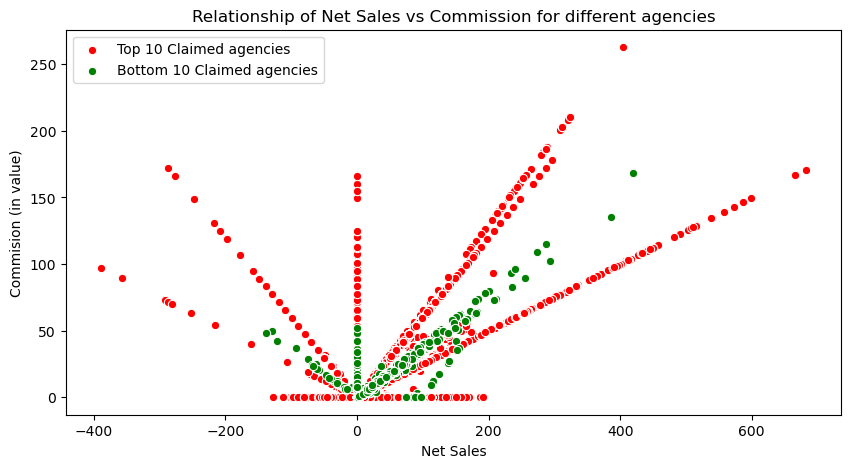

In [59]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train[train["Agency"].isin(top10_agencies)], x='Net Sales',
                y='Commision (in value)', color='red')
sns.scatterplot(data=train[train["Agency"].isin(bottom10_agencies)], x='Net Sales',
                y='Commision (in value)', color='green')
plt.title('Relationship of Net Sales vs Commission for different agencies')
plt.legend(['Top 10 Claimed agencies', 'Bottom 10 Claimed agencies'])
plt.show() 

##### Relationship of Net Sales with Commission for different Distribution Channels

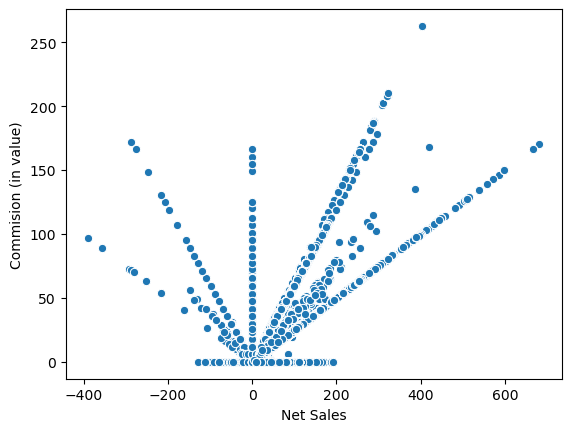

In [60]:
# 2 scatter plots with claimed with not claimed
sns.scatterplot(data=train[train['Distribution Channel']
                           == 'Online'], x='Net Sales', y='Commision (in value)')

<b> Insight </b>
- There is an absolute symmetry between positive net sales and negative net sales when plotted against commission

<b> Assumption </b>
- Since the discount is almost 200% we are assuming that online channel must have given heavy discounts (something like buy 1, get 1) to attract more customers

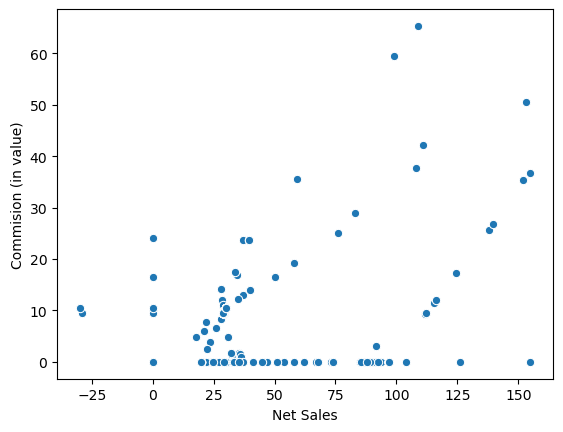

In [61]:
sns.scatterplot(data=train[train['Distribution Channel']
                           == 'Offline'], x='Net Sales', y='Commision (in value)')

##### Relationship of Net Sales with Commission for different Agency Types

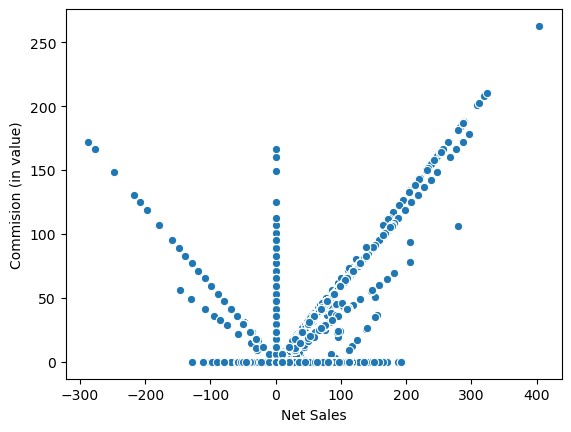

In [62]:
sns.scatterplot(data=train[train['Agency Type'] ==
                           'Travel Agency'], x='Net Sales', y='Commision (in value)')

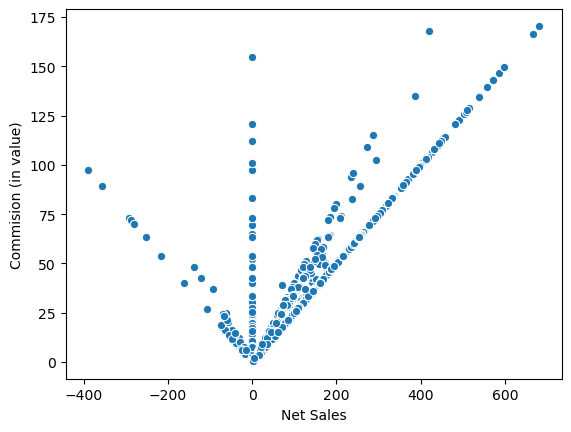

In [63]:
sns.scatterplot(data=train[train['Agency Type'] ==
                           'Airlines'], x='Net Sales', y='Commision (in value)')

<b> Insight </b>
- Airlines don't work with 0 commission

#### Agency vs Claims for Different Products

In [64]:
table1 = train.groupby(['Agency', 'Agency Type', 'Product Name', 'Claim'])[
    'Claim'].count().unstack()
table1.sort_values([1, 0], ascending=False, inplace=True)
table1.rename(columns={1: 'Claimed', 0: 'Not Claimed'}, inplace=True)
table1.head(10)

Claim                                                 Not Claimed  Claimed
Agency Agency Type   Product Name                                         
C2B    Airlines      Bronze Plan                           2703.0   2020.0
EPX    Travel Agency 2 way Comprehensive Plan              9098.0   1457.0
C2B    Airlines      Annual Silver Plan                     897.0   1451.0
                     Silver Plan                           1478.0   1384.0
CWT    Travel Agency Rental Vehicle Excess Insurance       5965.0    848.0
EPX    Travel Agency Cancellation Plan                    12899.0    355.0
JZI    Airlines      Basic Plan                            3796.0    246.0
C2B    Airlines      Annual Gold Plan                       123.0    172.0
                     Gold Plan                              237.0    143.0
LWC    Travel Agency Single Trip Travel Protect Gold        130.0    121.0

<b> Insight </b>
- C2B, which is an Airlines Travel Insurance Agency, trade into high risk insurance product such as Bronze Plan, Annual Silver Plan and Silver Plan with a high claim rate

<b> Recommendation </b>
- To pay low commission to agencies (C2B, EPX, JZI, LWC) for products enlisted above as they are trading into high risk products

#### What products have people above the age of 70 taken?

In [65]:
data=train[train['Age']>75].groupby(['Product Name'])['Duration'].max().sort_values(ascending=False)
data

Product Name
Annual Silver Plan                     389
Value Plan                             268
Comprehensive Plan                     265
Cancellation Plan                      199
Basic Plan                             187
Bronze Plan                            180
Silver Plan                            180
1 way Comprehensive Plan               163
2 way Comprehensive Plan               151
Rental Vehicle Excess Insurance        125
Single Trip Travel Protect Platinum    122
Travel Cruise Protect                  112
Gold Plan                               76
Premier Plan                            74
Single Trip Travel Protect Silver       32
Single Trip Travel Protect Gold         30
Ticket Protector                        22
24 Protect                               2
Name: Duration, dtype: int64

In [66]:
train[(train['Age']>75) & (train['Duration']>60)].shape[0]

169

In [67]:
test[(test['Age']>75) & (test['Duration']>60)].shape[0]

65

In [68]:
train[train['Age']>75]['Agency Type'].value_counts()

Airlines         747
Travel Agency    192
Name: Agency Type, dtype: int64

<b> Reference </b>
- https://www.comparetravelinsurance.com.au/seniors-travel-insurance/senior-travel-insurance-age-limits